# Supervised Learning Project

## 1. Read the column description and ensure you understand each attribute well

### 1.1 Description

Data of  5000 bank customers
Includes 
* Customer demographic information (age, income, etc.)
* Customer relationship to bank (mortgage, securities account, etc.)
* Customer response to the last personal loan campaign (Personal Loan)
* Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign

|         ID         |                                 Customer ID                                 |
|:------------------:|:---------------------------------------------------------------------------:|
|         Age        |                      Customer's age in completed years                      |
|     Experience     |                       number of years of professional experience                      |
|       Income       |                     Annual income of the customer (000)                    |
|      ZIP Code      |                            Home Address ZIP code                            |
|       Family       |                         Family size of the customer                         |
|        CCAvg       |                 Avg spending on credit cards per month (000)                |
|      Education     |        Education Level: * Undergrad* Graduate * Advanced/Professional       |
|      Mortgage      |                    Value of house mortgage if any. (000)                   |
|    Personal Loan   |   Did this customer accept the personal loan offered in the last campaign?  |
| Securities Account |          Does the customer have a securities account with the bank?         |
|     CD Account     | Does the customer have a certificate of deposit (CD) account with the bank? |
|       Online       |              Does the customer use internet banking facilities?             |
|     Credit card    |          Does the customer use a credit card issued by Thera Bank?          |


### 1.2 Objective: 

* management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors)
* devise campaigns with better target marketing to increase the success ratio with minimal budget

## 2. Study the data distribution in each attribute, share your findings

### 2.1 Import necessary libraries, read data and basic setup

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import copy

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore, skew

In [2]:
# settings 
%matplotlib inline
sns.set(style="darkgrid") 

In [3]:
# read data
data = pd.read_csv('./Bank_Personal_Loan_Modelling.xls')

In [4]:
# check the columns
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### 2.2 Find the shape of the data,data type of individual columns

In [5]:
# Find the shape of the data,data type of individual columns
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Observation:  <span style="color:red"> The data has 5000 rows and 13 columns with 12 integer and 1 float data type </span>

### 2.3 Check the presence of missing values

In [6]:
# Check the presence of missing values
data.isna().apply(pd.value_counts)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [7]:
data.isnull().values.any()

False

#### Observation:  <span style="color:red"> There are no missing values or null values in any of the columns</span>

### 2.4 5 point summary of numerical attributes (descriptive stats)

In [8]:
#5 point summary of numerical attributes (descriptive stats)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Observation:  
<ol>   
    <li><span style="color:red">Data looks legit and all values are in resonable range</span></li> 
    <li><span style="color:red">The avg age reveals the data is representative of adult population</span></li>
    <li><span style="color:red">75% population have annual income less than or equal to 98.0</span></li>
    <li><span style="color:red">75% population have CCAvg less than or equal to 2.50</span></li>
    <li><span style="color:red">50% population has mortgage value 0.0</span></li>
</ol>

### 2.5 Find the distribution of numerical columns and skeweness or presence of outliers 

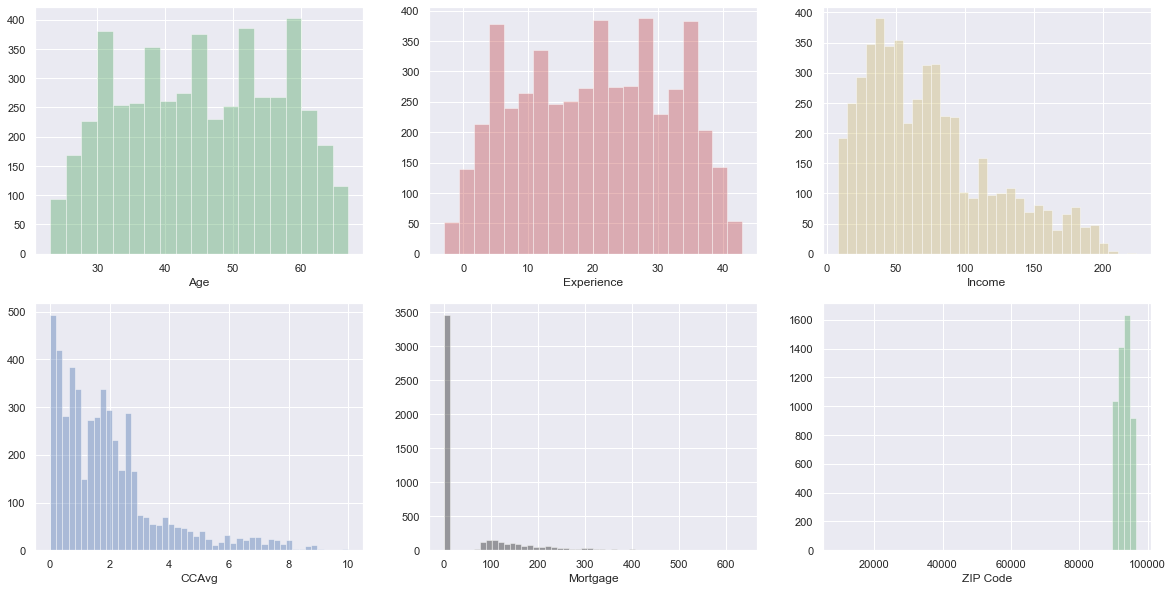

In [9]:
# Find the distribution of numerical columns and the asssociated skeweness and presence of outliers 
fig, axs = plt.subplots(2,3, figsize=(20,10))
axs=axs.flatten()
sns.set_color_codes()
sns.distplot(data.Age, color="g", ax=axs[0], kde=False);
sns.distplot(data.Experience, color="r", ax=axs[1], kde=False);
sns.distplot(data.Income, color="y", ax=axs[2], kde=False);
sns.distplot(data.CCAvg, color="b", ax=axs[3], kde=False);
sns.distplot(data.Mortgage, color="k", ax=axs[4], kde=False);
sns.distplot(data['ZIP Code'], color="g", ax=axs[5], kde=False);

#### Observation:  
<ol>   
    <li><span style="color:red">Age and Experience appear to be uniformly distributed in the mid-range expect for extreme values</span></li> 
    <li><span style="color:red">Income is moderatley skewed to the left</span></li>
    <li><span style="color:red">CCAvg and Mortgage are heavily skewed to the left</span></li>
    <li><span style="color:red">Majority dosen't have Mortgage</span></li>
    <li><span style="color:red">The ZIP Code even though discrete appears like a continious variable and follows a distribution extremely skewed to the right possibly due to presence of extreme values</span></li>
</ol>

### 2.6 Measure of skewness

In [10]:
# Measure of skewness
skewness = pd.DataFrame({'skewness' : [skew(data.Age),skew(data.Experience),skew(data.Income),skew(data.CCAvg),skew(data.Mortgage),skew(data['ZIP Code'])]},
                        index=['Age','Experience','Income','CCAvg','Mortgage', 'ZIP Code'])  # Measure the skeweness of the required columns
skewness

,skewness
Age,-0.029332
Experience,-0.026317
Income,0.841086
CCAvg,1.597964
Mortgage,2.103371
ZIP Code,-12.496471


#### Observation:  
<ol>    
    <li><span style="color:red">The skewness values validates the EDA observations</span></li>
    <li><span style="color:red">Income is moderatley skewed as observed in previous step</span></li>
    <li><span style="color:red">CCAvg and Mortgage are heavily skewed as observed in previous step</span></li>
</ol>

### 2.7 Checking the presense of Outliers

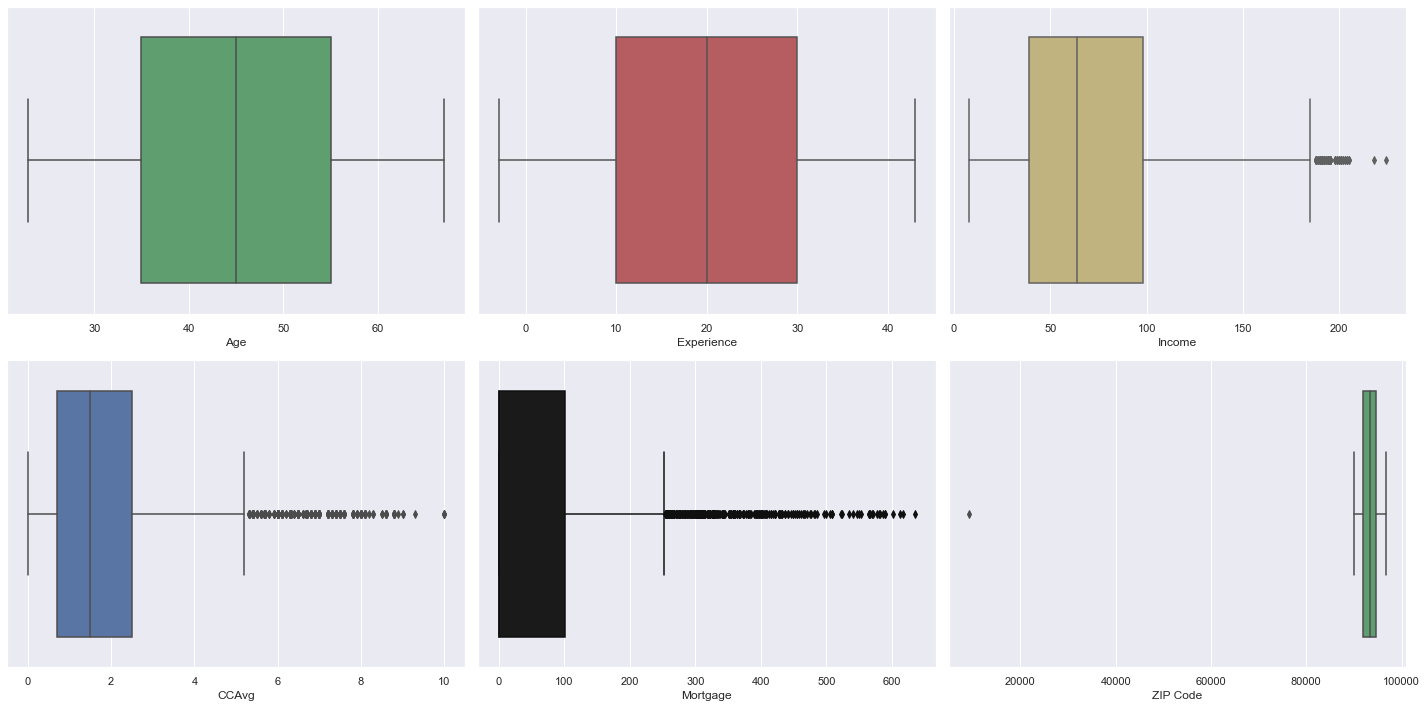

In [11]:
# Checking the presense of Outliers
fig, axs = plt.subplots(2,3, figsize=(20,10))
axs=axs.flatten()
sns.set_color_codes()
sns.boxplot(data.Age, color="g", ax=axs[0]);
sns.boxplot(data.Experience, color="r", ax=axs[1]);
sns.boxplot(data.Income, color="y", ax=axs[2]);
sns.boxplot(data.CCAvg, color="b", ax=axs[3]);
sns.boxplot(data.Mortgage, color="k", ax=axs[4]);
sns.boxplot(data['ZIP Code'], color="g", ax=axs[5]);
plt.tight_layout()

#### Observation:  
<ol>   
    <li><span style="color:red">Age and Experience have no extreme values or outliers</span></li> 
    <li><span style="color:red">Income has a few outliers</span></li>
    <li><span style="color:red">CCAvg and Mortgage are highly skewed and therefore has a lot of outliers</span></li>
    <li><span style="color:red">The zip code has an extreme outlier value towards the left which makes it extremely skewed</span></li>
</ol>

### 2.8 Removing the extreme outlier of ZIP Code

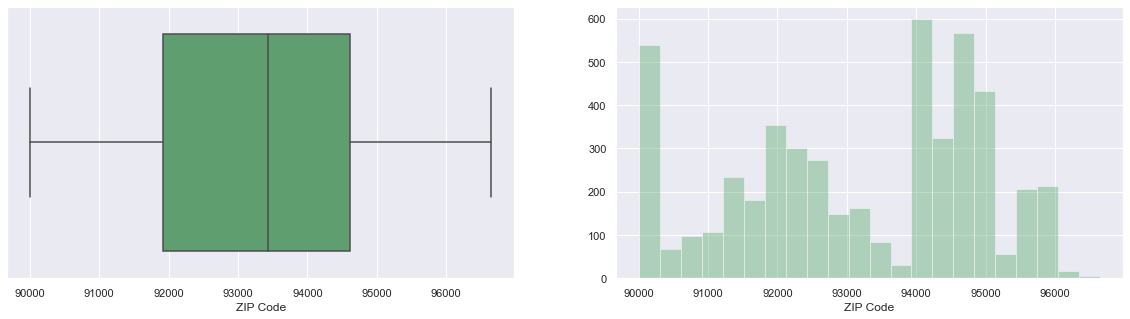

In [12]:
# Removing the extreme outlier of ZIP Code
data = data[data['ZIP Code'] > 80000] 

fig, axs = plt.subplots(1,2, figsize=(20,5))

sns.boxplot(data['ZIP Code'], color="g", ax=axs[0]);
sns.distplot(data['ZIP Code'], color="g", ax=axs[1], kde=False);

#### Observation:  
<ol>
    <li><span style="color:red">The distribution has got multiple peak values</span></li> 
</ol>

### 2.9 Distribution of categorical columns

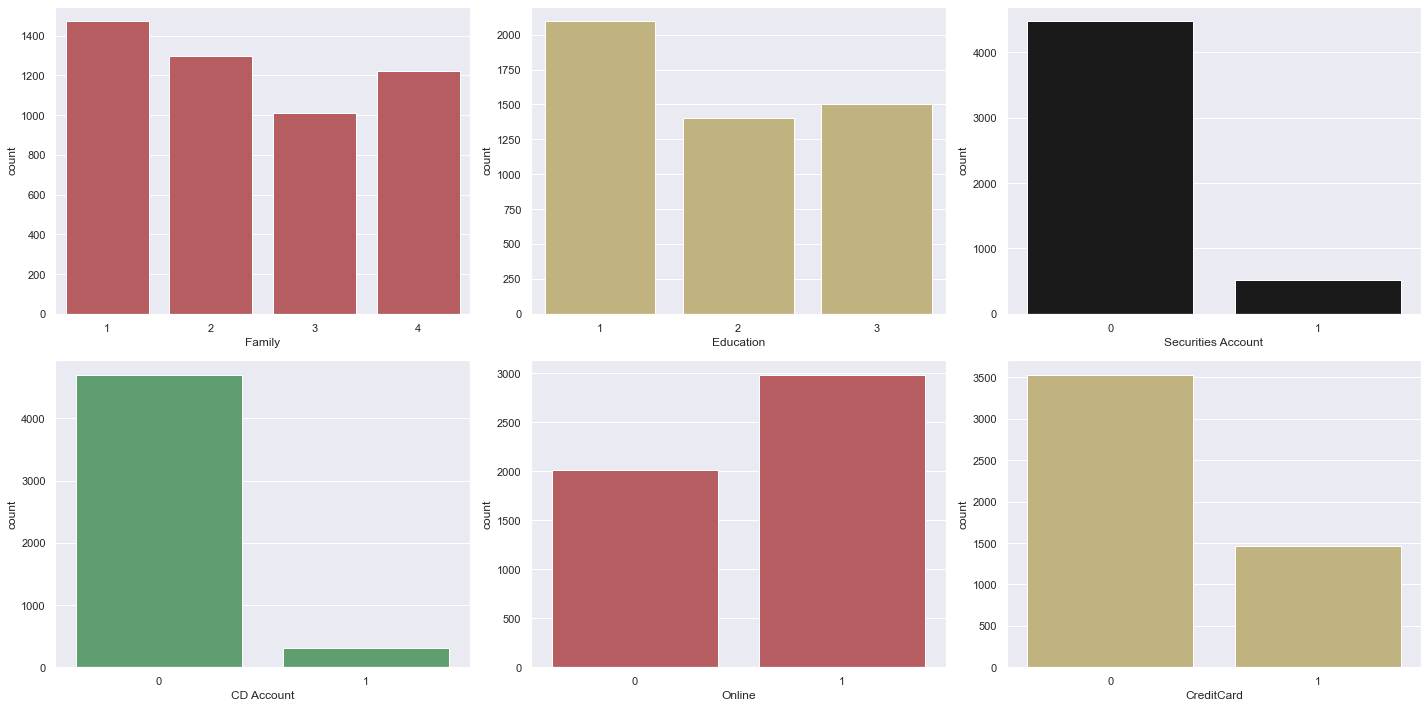

In [13]:
# Distribution of categorical columns
fig, axs = plt.subplots(2,3, figsize=(20,10))
sns.set_color_codes()
axs=axs.flatten()
sns.countplot(data['Family'], color="r", ax=axs[0]);
sns.countplot(data['Education'], color="y", ax=axs[1]);
sns.countplot(data['Securities Account'], color="k", ax=axs[2]);
sns.countplot(data['CD Account'], color="g", ax=axs[3]);
sns.countplot(data['Online'], color="r", ax=axs[4]);
sns.countplot(data['CreditCard'], color="y", ax=axs[5]);
plt.tight_layout()

#### Observation:  
<ol>   
    <li><span style="color:red"> Number of families with smaller size slightly dominate over number of families with larger size</span></li> 
    <li><span style="color:red">Number of undergraduates are higher than number of graduates or advanced professionals</span></li>
    <li><span style="color:red">Number of customers who have a securities account is significantly  lower than those who haven't</span></li>
    <li><span style="color:red">Number of customers who have a certificate of deposit (CD)
account is significantly  lower than those who haven't</span></li>
    <li><span style="color:red">A good majority of customers use internet banking</span></li>
    <li><span style="color:red">The number of customers who use a credit card issued by thera bank is less than half of the customers who don't use it</span></li>
</ol>

### 2.10 Bi-variate distribution of variables

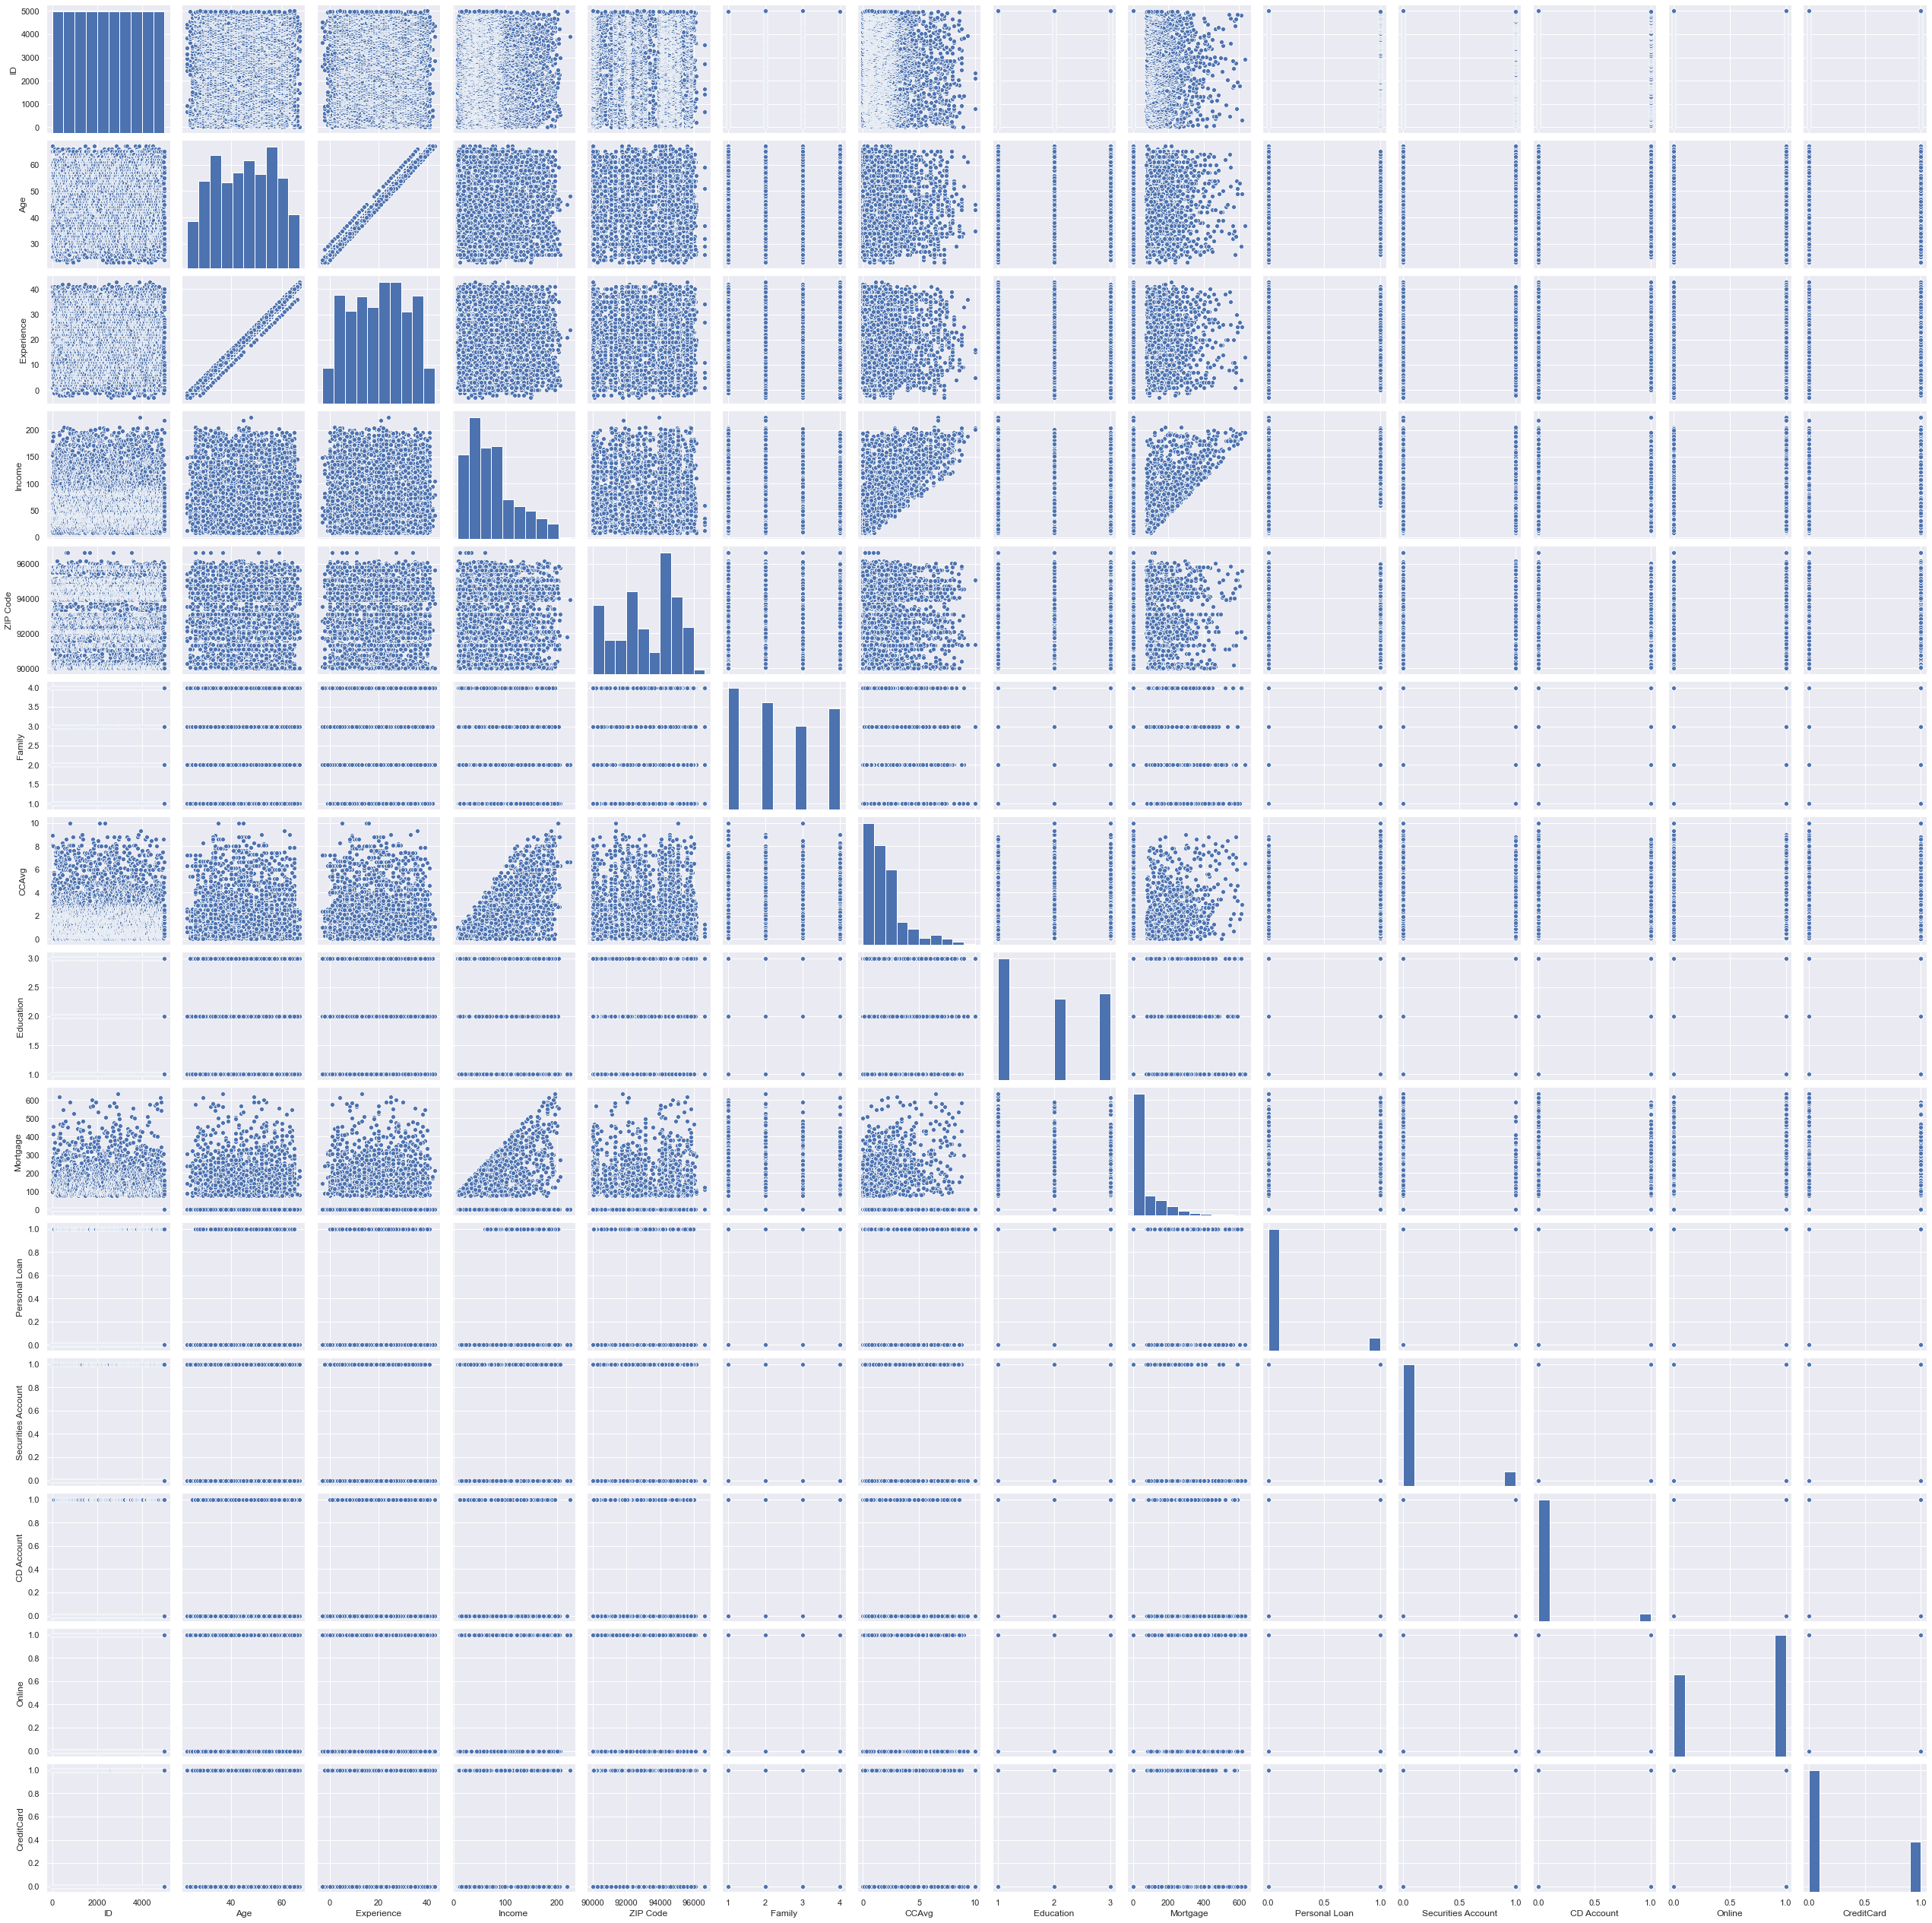

In [14]:
# Bi-variate distribution of variables
# There are no character or string types in categorical columns and hence no need to do encoding
sns.pairplot(data);

#### Observation:  
<ol>   
    <li><span style="color:red">There is a linear correlation between 'Age' and 'Experience' which is obvious as older people will work for a longer peroid</span></li> 
    <li><span style="color:red">The 'CCavg' and 'Mortgage' is almost always less than or equal to the 'Income' which is obvious as expense cannot exceed the income</span></li>
    <li><span style="color:red">There are no visibly obvious correlation for 'Personal Loan' with other variables</span></li>
</ol>

### 2.11 Correlations Analysis

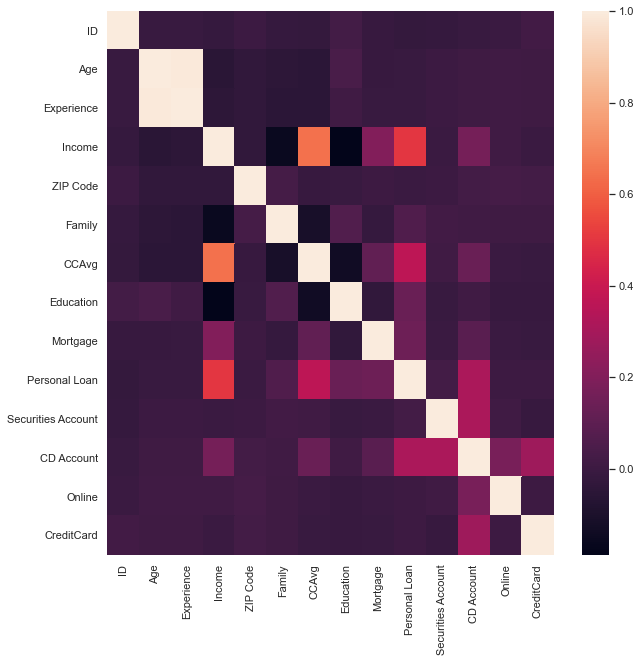

In [15]:
#Correlations 
corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr)
plt.show()

In [16]:
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008330,-0.008203,-0.018037,0.002225,-0.016394,-0.024906,0.021862,-0.014086,-0.024902,-0.017076,-0.006985,-0.002288,0.017491
Age,-0.008330,1.000000,0.994215,-0.055164,-0.030526,-0.046566,-0.051941,0.041211,-0.012484,-0.007694,-0.000403,0.008068,0.013622,0.007530
Experience,-0.008203,0.994215,1.000000,-0.046483,-0.030452,-0.052694,-0.050015,0.013041,-0.010535,-0.007385,-0.001203,0.010375,0.013829,0.008837
Income,-0.018037,-0.055164,-0.046483,1.000000,-0.030725,-0.157232,0.645931,-0.187277,0.206712,0.502459,-0.002695,0.169703,0.014397,-0.002030
ZIP Code,0.002225,-0.030526,-0.030452,-0.030725,1.000000,0.027532,-0.012197,-0.008254,0.003608,-0.002977,0.002418,0.021669,0.028328,0.024055
Family,-0.016394,-0.046566,-0.052694,-0.157232,0.027532,1.000000,-0.109088,0.064581,-0.020294,0.061471,0.020094,0.014184,0.010127,0.011160
CCAvg,-0.024906,-0.051941,-0.050015,0.645931,-0.012197,-0.109088,1.000000,-0.135952,0.109829,0.366864,0.015035,0.136504,-0.003486,-0.006454
Education,0.021862,0.041211,0.013041,-0.187277,-0.008254,0.064581,-0.135952,1.000000,-0.033186,0.136834,-0.010723,0.014004,-0.015227,-0.011432
Mortgage,-0.014086,-0.012484,-0.010535,0.206712,0.003608,-0.020294,0.109829,-0.033186,1.000000,0.142065,-0.005449,0.089286,-0.005904,-0.007061
Personal Loan,-0.024902,-0.007694,-0.007385,0.502459,-0.002977,0.061471,0.366864,0.136834,0.142065,1.000000,0.021932,0.316344,0.006332,0.002903


#### Observation:  
<ol>   
    <li><span style="color:red">The strong linear correlation between 'Age' and 'Experience' is validated from thee table with a coefficient of 0.994</span></li> 
    <li><span style="color:red">'Personal Loan and 'Income' appears to have a moderate linear correlation</span></li>
</ol>

## 3. Get the target column distribution. Your comments

### 3.1 Count plot of target column

##### Based on the objective the target column is  the <b>'Personal Loan'</b> column

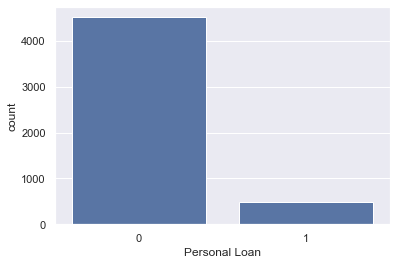

In [17]:
sns.countplot(data['Personal Loan'], color="b");

#### Observation:  
<ol>   
    <li><span style="color:red">Number of customers who accepted the loan is significantly lower than those rejected (9.6 %)</span></li>
</ol>

### 3.2 Count plot of target column with Family and Education

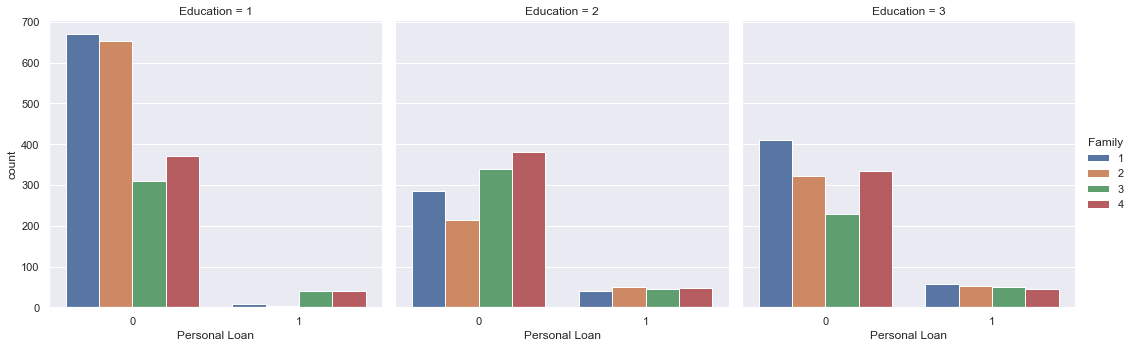

In [18]:
sns.catplot(x="Personal Loan",
               hue="Family", 
               col="Education", 
               data=data, 
               kind="count");

#### Observation:  
<ol>   
    <li><span style="color:red">Undergrads with small family (1,2) almost never accept the personal loan offered</span></li> 
    <li><span style="color:red">Graduates and professionals accept loan mostly irrespective of family size</span></li>
    <li><span style="color:red">Graduates and professionals are more likely to accept personal loans</span></li>
</ol>

### 3.3 Count plot of target column with with Accounts columns

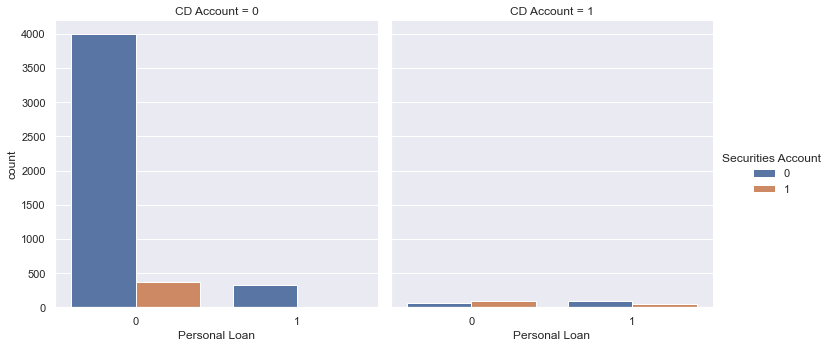

In [19]:
sns.catplot(x="Personal Loan",
               hue="Securities Account", 
               col="CD Account", 
               data=data, 
               kind="count");

#### Observation:  
<ol>   
    <li><span style="color:red">People without 'Securities Account' and 'CD Account' are very likely to reject personal loan</span></li> 
</ol>

### 3.4 Count plot of target column with CreditCard and Online

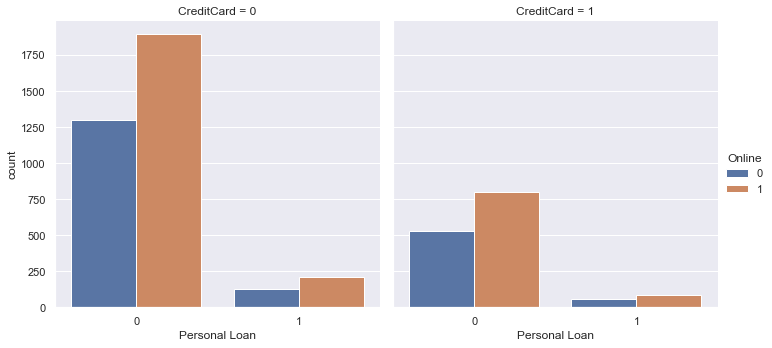

In [20]:
sns.catplot(x="Personal Loan",
               hue="Online", 
               col="CreditCard", 
               data=data, 
               kind="count");

#### Observation:  
<ol>   
    <li><span style="color:red">The acceptance of 'Personal Loan' appears not to depend much on 'CreditCard' and 'Online' banking</span></li> 
</ol>

### 3.5 Bar plot of target column with Income, Family and Education

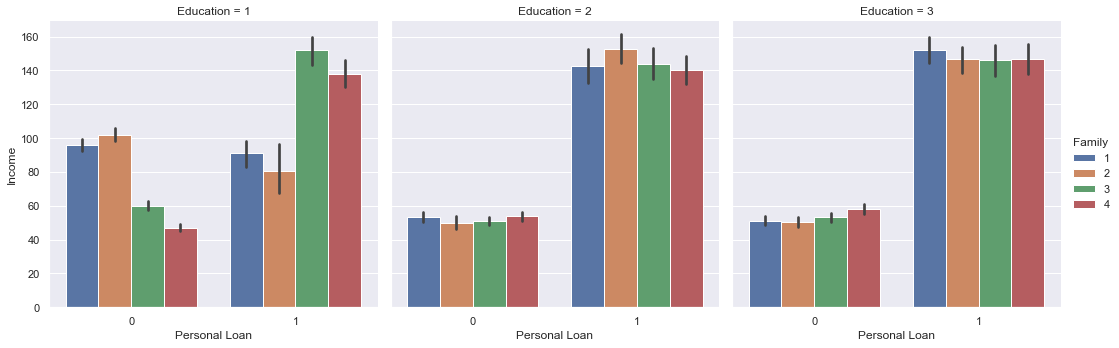

In [21]:
sns.catplot(x="Personal Loan",
               y = "Income",
               hue="Family", 
               col="Education", 
               data=data, 
               kind="bar");

#### Observation:  
<ol>   
    <li><span style="color:red">Undergrads who reject personal loan and have large families (3,4) have lesser average income compared to those with small families (1, 2)</span></li>
    <li><span style="color:red">Undergrads who accept personal loan and have large families (3,4) have greater average income compared to those with small families (1, 2)</span></li>
    <li><span style="color:red">But the average income of graduates and professionals looks independent of family size irrespective of whether they accept or reject the personal loan</span></li>
</ol>

### 3.6 Bar plot of target column with CCAvg, Family and Education

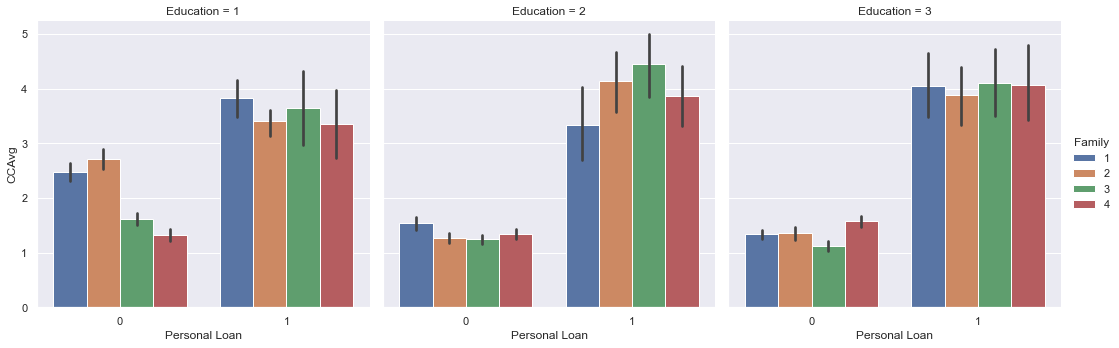

In [22]:
sns.catplot(x="Personal Loan",
               y = "CCAvg",
               hue="Family", 
               col="Education", 
               data=data, 
               kind="bar");

#### Observation:  
<ol>   
    <li><span style="color:red">Undergrads who reject personal loan and have large families (3,4) have lesser average expense compared to those with small families (1, 2)</span></li>
    <li><span style="color:red">Undergrads who accept personal loan and have large families (3,4) have almost same average expense compared to those with small families (1, 2)</span></li>
    <li><span style="color:red">Similar to average income the average expense of graduates and professionals looks almost independent of family size and whether they accept or reject the personal loan</span></li>
</ol>

## 4. Split the data into training and test set in the ratio of 70:30 respectively

### 4.1 For logistic Regression

In [23]:
# Splitting data for logistic regression
X = data.drop(['Personal Loan', 'ID'], axis =1)
Y = data['Personal Loan']
lX_train, lX_test, lY_train, lY_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [24]:
# Checking the length of split data
print("{0:0.2f}% data is in training set".format((len(lX_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(lX_test)/len(data.index)) * 100))

69.99% data is in training set
30.01% data is in test set


In [25]:
#Cheking the ratio of customers who accepted Personal Loan in original and test data
print("Original 'Personal Loan' True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 1]), (len(data.loc[data['Personal Loan'] == 1])/len(data.index)) * 100))
print("Original 'Personal Loan' False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 0]), (len(data.loc[data['Personal Loan'] == 0])/len(data.index)) * 100))
print("")
print("Training 'Personal Loan' True Values    : {0} ({1:0.2f}%)".format(len(lY_train[lY_train[:] == 1]), (len(lY_train[lY_train[:] == 1])/len(lY_train)) * 100))
print("Training 'Personal Loan' False Values   : {0} ({1:0.2f}%)".format(len(lY_train[lY_train[:] == 0]), (len(lY_train[lY_train[:] == 0])/len(lY_train)) * 100))
print("")
print("Test 'Personal Loan' True Values        : {0} ({1:0.2f}%)".format(len(lY_test[lY_test[:] == 1]), (len(lY_test[lY_test[:] == 1])/len(lY_test)) * 100))
print("Test 'Personal Loan' False Values       : {0} ({1:0.2f}%)".format(len(lY_test[lY_test[:] == 0]), (len(lY_test[lY_test[:] == 0])/len(lY_test)) * 100))
print("")

Original 'Personal Loan' True Values    : 480 (9.60%)
Original 'Personal Loan' False Values   : 4519 (90.40%)

Training 'Personal Loan' True Values    : 332 (9.49%)
Training 'Personal Loan' False Values   : 3167 (90.51%)

Test 'Personal Loan' True Values        : 148 (9.87%)
Test 'Personal Loan' False Values       : 1352 (90.13%)



#### Observation:  
<ol>   
    <li><span style="color:red">The distribution of True/False cases in Train and Test datasets are good</span></li> 
</ol>

### 4.2 For kNN

In [26]:
#Scaled X values for kNN
X_scaled  = X.apply(zscore)   
X_scaled.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,4.999000e+03,4.999000e+03,4.999000e+03,4.999000e+03,4.999000e+03,4.999000e+03,4.999000e+03,4.999000e+03,4.999000e+03,4.999000e+03,4.999000e+03,4.999000e+03
mean,1.566616e-16,2.669510e-17,4.835433e-17,3.086593e-16,-1.765608e-16,-4.415130e-17,7.271639e-16,-3.350435e-16,-4.289205e-16,3.573190e-16,-5.991962e-17,7.290738e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948660e+00,-2.014661e+00,-1.429243e+00,-1.798441e+00,-1.216692e+00,-1.109095e+00,-1.048893e+00,-5.555966e-01,-3.414615e-01,-2.535673e-01,-1.216414e+00,-6.450948e-01
25%,-9.018032e-01,-8.810469e-01,-7.557357e-01,-7.151509e-01,-1.216692e+00,-7.085354e-01,-1.048893e+00,-5.555966e-01,-3.414615e-01,-2.535673e-01,-1.216414e+00,-6.450948e-01
50%,-2.942256e-02,-9.035842e-03,-2.125842e-01,1.521634e-01,-3.451855e-01,-2.507533e-01,1.419805e-01,-5.555966e-01,-3.414615e-01,-2.535673e-01,8.220886e-01,-6.450948e-01
75%,8.429581e-01,8.629752e-01,5.261018e-01,8.177105e-01,5.263207e-01,3.214742e-01,1.332854e+00,4.374163e-01,-3.414615e-01,-2.535673e-01,8.220886e-01,1.550160e+00
max,1.889815e+00,1.996590e+00,3.263585e+00,1.978866e+00,1.397827e+00,4.613181e+00,1.332854e+00,5.687603e+00,2.928588e+00,3.943727e+00,8.220886e-01,1.550160e+00


In [29]:
# Splitting data for kNN
kX_train, kX_test, kY_train, kY_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=1)

### 4.3 For Naive Bayes

In [30]:
# Splitting data for NB
nX_train, nX_test, nY_train, nY_test = train_test_split(X, Y, test_size=0.30, random_state=1)

## 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans

### 5.1 Logistic Regression

In [31]:
# Fit Logistic regression model on train
model_logistic = LogisticRegression(solver="liblinear")
model_logistic.fit(lX_train, lY_train)
#Predict on test
lY_predict = model_logistic.predict(lX_test)


coeff = pd.DataFrame(model_logistic.coef_)
coeff['intercept'] = model_logistic.intercept_
display(coeff)

,0,1,2,3,4,5,6,7,8,9,10,11,intercept
0,0.00408,0.000357,0.036668,-0.000069,0.016449,0.00596,0.017838,0.000667,0.000694,0.004293,0.000181,-0.00039,-0.000066


In [32]:
model_logistic.score(lX_test, lY_test)

0.9

In [33]:
#Check for overfitting
lY_predict_train = model_logistic.predict(lX_train)
lY_predict_test = model_logistic.predict(lX_test)

print("Logistic Regression Model Accuracy for training data: {0:.4f}".format(metrics.accuracy_score(lY_train, lY_predict_train)))
print("Logistic Regression Model Accuracy for testing data: {0:.4f}".format(metrics.accuracy_score(lY_test, lY_predict_test)))

Logistic Regression Model Accuracy for training data: 0.9125
Logistic Regression Model Accuracy for testing data: 0.9000


### 5.2 kNN

In [34]:
model_kNN = KNeighborsClassifier(n_neighbors=6  , weights = 'distance' )

# Fit kNN model on train
model_kNN.fit(kX_train, kY_train)
#Predict on test
kY_predict = model_kNN.predict(kX_test)

In [35]:
model_kNN.score(kX_test, kY_test)

0.946

In [36]:
#Check for overfitting
kY_predict_train = model_kNN.predict(kX_train)
kY_predict_test = model_kNN.predict(kX_test)

print("kNN Model Accuracy for training data: {0:.4f}".format(metrics.accuracy_score(kY_train, kY_predict_train)))
print("kNN Model Accuracy for testing data: {0:.4f}".format(metrics.accuracy_score(kY_test, kY_predict_test)))

kNN Model Accuracy for training data: 1.0000
kNN Model Accuracy for testing data: 0.9460


### 5.3 Naive Bayes

In [37]:
# Fit NB model on train
model_NB = GaussianNB()
model_NB.fit(nX_train, nY_train)

nY_predict = model_NB.predict(nX_test)

In [38]:
model_NB.score(nX_test, nY_test)

0.8826666666666667

In [39]:
#Check for overfitting
nY_predict_train = model_NB.predict(nX_train)
nY_predict_test = model_NB.predict(nX_test)

print("Naive Bayes Model Accuracy for training data: {0:.4f}".format(metrics.accuracy_score(nY_train, nY_predict_train)))
print("Naive Bayes Model Accuracy for testing data: {0:.4f}".format(metrics.accuracy_score(nY_test, nY_predict_test)))

Naive Bayes Model Accuracy for training data: 0.8885
Naive Bayes Model Accuracy for testing data: 0.8827


## 6. Print the confusion matrix for all the above models

### 6.1 Logistic Regression

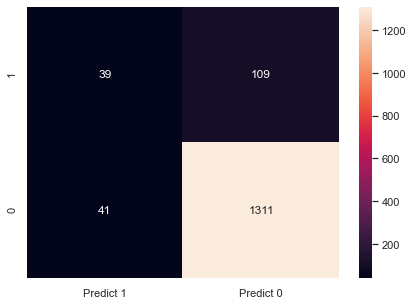

In [40]:
#print confusion matrix for logistic regression
cm=metrics.confusion_matrix(lY_test, lY_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g');

### 6.2 kNN

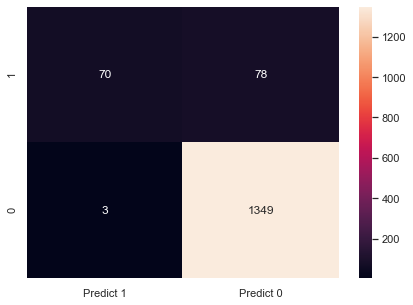

In [41]:
#print confusion matrix for kNN
cm=metrics.confusion_matrix(kY_test, kY_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g');

### 6.3 Naive Bayes

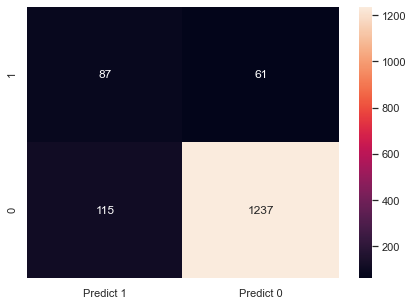

In [42]:
#print confusion matrix for NB
cm=metrics.confusion_matrix(nY_test, nY_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g');

## 7. Give your reasoning on which is the best model in this case and why it performs better?

| TP | FN |
|----|----|
| FP | TN |

In the confusion matrix:

- TP: The customer is predicted to accept Personal Loan and will accept Personal Loan <b>(value addition to targeted marketing)</b>
- FN: The customer is predicted to reject Personal Loan but will accept Personal Loan <b>(neutral from marketing perspective)</b>
- FP: The customer is predicted to accept Personal Loan but will reject Personal Loan <b>(loss in targeted marketing)</b>
- TN: The customer is predicted to reject Personal Loan and will reject Personal Loan <b>(value addition to targeted marketing)</b>

<ol>   
    <li><span style="color:red">From the campaign objective of the problem (i.e, with minimal budget increase success ratio) FP should be reduced to cut the cost</span></li> 
    <li><span style="color:red">Hence, KNN model with minimal FP is the better one because it saves money for minimal budget targeted marketing</span></li>
</ol>

In [43]:
# Other matrices
print("Classification Report for Logistic Regression")
print(metrics.classification_report(lY_test, lY_predict, labels=[1, 0]))

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           1       0.49      0.26      0.34       148
           0       0.92      0.97      0.95      1352

    accuracy                           0.90      1500
   macro avg       0.71      0.62      0.64      1500
weighted avg       0.88      0.90      0.89      1500



In [44]:
# Other matrices
print("Classification Report for kNN")
print(metrics.classification_report(kY_test, kY_predict, labels=[1, 0]))

Classification Report for kNN
              precision    recall  f1-score   support

           1       0.96      0.47      0.63       148
           0       0.95      1.00      0.97      1352

    accuracy                           0.95      1500
   macro avg       0.95      0.74      0.80      1500
weighted avg       0.95      0.95      0.94      1500



In [45]:
# Other matrices
print("Classification Report for Naive Bayes")
print(metrics.classification_report(nY_test, nY_predict, labels=[1, 0]))

Classification Report for Naive Bayes
              precision    recall  f1-score   support

           1       0.43      0.59      0.50       148
           0       0.95      0.91      0.93      1352

    accuracy                           0.88      1500
   macro avg       0.69      0.75      0.72      1500
weighted avg       0.90      0.88      0.89      1500



<ol>   
    <li><span style="color:red">The precision for true value (1) is far better for kNN compared to others</span></li>
    <li><span style="color:red">Also overall f1 score, precision and recall is better for kNN which again states that kNN is a better model</span></li> 
</ol>

In [46]:
#Function to calculate custom matrices
def disp_metrics(tp, fn, fp, tn):
    # Classification error rate (CER)
    CER = (fp+fn)/(tp+tn+fp+fn)
    #Sensitivity (TPR)
    TPR = tp/(tp+fn)
    #Specificity (TNR)
    TNR = tn/(tn+fp)
    return pd.Series([CER, TPR, TNR], index=['CER', 'TPR', 'TNR'])

In [47]:
print("Error-rate, sensitivity and specificity")
cm=metrics.confusion_matrix(lY_test, lY_predict, labels=[1, 0])
tp, fn, fp, tn = cm.ravel()
logistic_m = disp_metrics(tp, fn, fp, tn)
logistic_m.name='logistic'
cm=metrics.confusion_matrix(kY_test, kY_predict, labels=[1, 0])
tp, fn, fp, tn = cm.ravel()
kNN_m = disp_metrics(tp, fn, fp, tn)
kNN_m.name='kNN'
cm=metrics.confusion_matrix(nY_test, nY_predict, labels=[1, 0])
tp, fn, fp, tn = cm.ravel()
NB_m = disp_metrics(tp, fn, fp, tn)
NB_m.name='NB_m'
pd.concat([logistic_m, kNN_m, NB_m], axis=1)

Error-rate, sensitivity and specificity


,logistic,kNN,NB_m
CER,0.100000,0.054000,0.117333
TPR,0.263514,0.472973,0.587838
TNR,0.969675,0.997781,0.914941


## 8. Improving the performance of basic Models developed above (Some additional tasks not asked in the questionare)

### 8.1 Cross validation with 10 different random seeds


In [48]:
X = data.drop(['Personal Loan', 'ID'], axis =1)
Y = data['Personal Loan']
acc =[]
for i in range(10):
    lX_train, lX_test, lY_train, lY_test = train_test_split(X, Y, test_size=0.30, random_state=i+1)

    # Fit Logistic regression model on train
    model_logistic = LogisticRegression(solver="liblinear")
    model_logistic.fit(lX_train, lY_train)
    acc.append(model_logistic.score(lX_test, lY_test))
acc = np.asarray(acc)
print("The average accuracy of Logistic Regression is {}".format(np.mean(acc)))

The average accuracy of Logistic Regression is 0.9074000000000002


In [53]:
X = data.drop(['Personal Loan', 'ID'], axis =1)
Y = data['Personal Loan']
X_scaled  = X.apply(zscore) 
acc = []
for i  in range(10):
    kX_train, kX_test, kY_train, kY_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i+1)    
    model_kNN = KNeighborsClassifier(n_neighbors=6  , weights = 'distance' )
    model_kNN.fit(kX_train, kY_train)
    acc.append(model_kNN.score(kX_test, kY_test))
acc = np.asarray(acc)
print("The average accuracy of kNN is {}".format(np.mean(acc)))   

The average accuracy of kNN is 0.9547333333333334


In [54]:
X = data.drop(['Personal Loan', 'ID'], axis =1)
Y = data['Personal Loan']
acc =[]
for i in range(10):
        nX_train, nX_test, nY_train, nY_test = train_test_split(X, Y, test_size=0.30, random_state=i+1)
        model_NB = GaussianNB()
        model_NB.fit(nX_train, nY_train)
        acc.append(model_NB.score(nX_test, nY_test))
acc = np.asarray(acc)
print("The average accuracy of NB is {}".format(np.mean(acc)))   

The average accuracy of NB is 0.8883333333333333


### 8.2  Dropping outliers in selected attributes


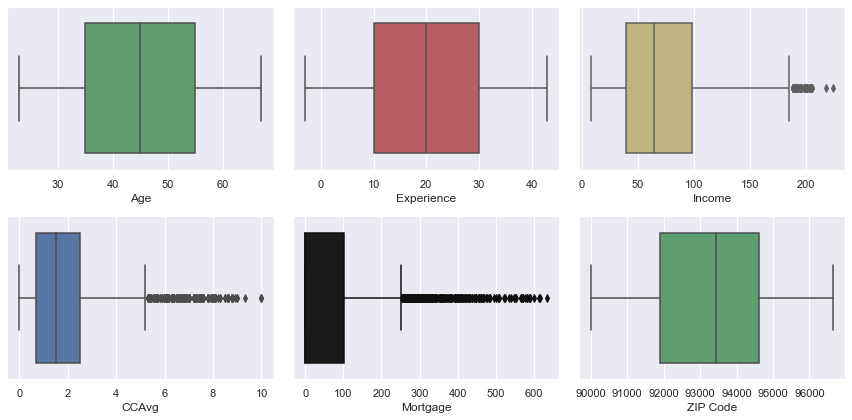

In [55]:
## 8.2 Dropping Outliers in selected attributes

# Checking the presense of Outliers
fig, axs = plt.subplots(2,3, figsize=(12,6))
axs=axs.flatten()
sns.set_color_codes()
sns.boxplot(data.Age, color="g", ax=axs[0]);
sns.boxplot(data.Experience, color="r", ax=axs[1]);
sns.boxplot(data.Income, color="y", ax=axs[2]);
sns.boxplot(data.CCAvg, color="b", ax=axs[3]);
sns.boxplot(data.Mortgage, color="k", ax=axs[4]);
sns.boxplot(data['ZIP Code'], color="g", ax=axs[5]);
plt.tight_layout()

In [66]:
data_f = data[data['Income']<150]
data_f = data_f[data_f['CCAvg']<4.5]
data_f = data_f[data_f['Mortgage']<240]

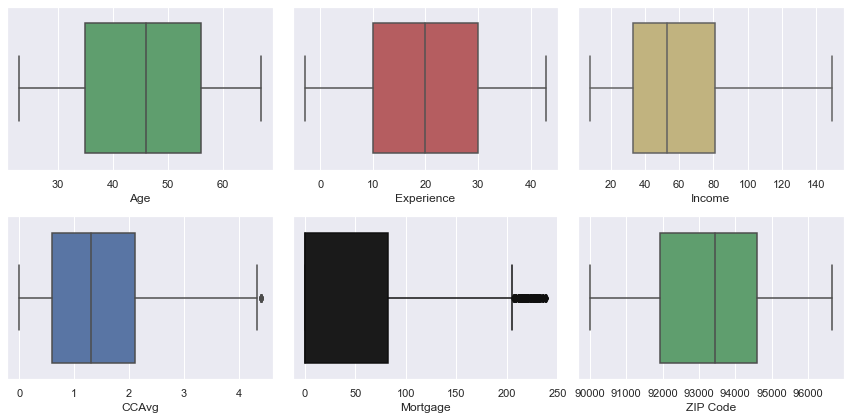

In [67]:
fig, axs = plt.subplots(2,3, figsize=(12,6))
axs=axs.flatten()
sns.set_color_codes()
sns.boxplot(data_f.Age, color="g", ax=axs[0]);
sns.boxplot(data_f.Experience, color="r", ax=axs[1]);
sns.boxplot(data_f.Income, color="y", ax=axs[2]);
sns.boxplot(data_f.CCAvg, color="b", ax=axs[3]);
sns.boxplot(data_f.Mortgage, color="k", ax=axs[4]);
sns.boxplot(data_f['ZIP Code'], color="g", ax=axs[5]);
plt.tight_layout()

In [68]:
X = data_f.drop(['Personal Loan', 'ID'], axis =1)
Y = data_f['Personal Loan']
acc =[]
for i in range(10):
    lX_train, lX_test, lY_train, lY_test = train_test_split(X, Y, test_size=0.30, random_state=i+1)

    # Fit Logistic regression model on train
    model_logistic = LogisticRegression(solver="liblinear")
    model_logistic.fit(lX_train, lY_train)
    acc.append(model_logistic.score(lX_test, lY_test))
acc = np.asarray(acc)
print("The average accuracy of Logistic Regression is {}".format(np.mean(acc)))

The average accuracy of Logistic Regression is 0.9568532035685321


In [69]:
X = data_f.drop(['Personal Loan', 'ID'], axis =1)
Y = data_f['Personal Loan']
X_scaled  = X.apply(zscore) 
acc = []
for i  in range(10):
    kX_train, kX_test, kY_train, kY_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i+1)    
    model_kNN = KNeighborsClassifier(n_neighbors=6  , weights = 'distance' )
    model_kNN.fit(kX_train, kY_train)
    acc.append(model_kNN.score(kX_test, kY_test))
acc = np.asarray(acc)
print("The average accuracy of kNN is {}".format(np.mean(acc)))   

The average accuracy of kNN is 0.9653690186536903


In [70]:
X = data.drop(['Personal Loan', 'ID'], axis =1)
Y = data['Personal Loan']
acc =[]
for i in range(10):
        nX_train, nX_test, nY_train, nY_test = train_test_split(X, Y, test_size=0.30, random_state=i+1)
        model_NB = GaussianNB()
        model_NB.fit(nX_train, nY_train)
        acc.append(model_NB.score(nX_test, nY_test))
acc = np.asarray(acc)
print("The average accuracy of NB is {}".format(np.mean(acc)))   

The average accuracy of NB is 0.8883333333333333


<ol>   
    <li><span style="color:red">Logistic Regression accuracy increased with removing skewness of data</span></li>
</ol>

### 8.3  Dropping attributes with less correlation


### 8.4  One hot encoding 'Education' to eliminate possible error due to ordinal sequence


### 8.5 Hyperparameter tuning of kNN

### 8.6 ROC Curve and K-S, line chart analysis for probabilistic output of logistic regression

### 8.7 Feature Engineering 